# Groceries dataset: unsupervised learning and association rules: apriori algorithm
The following exercise is taken from <b> Machine Learning with R</b> by <b> Brett Lantz </b> (Third Edition)

The dataset used in the exercise is the <b>groceries</b> dataset. The dataset was orginainally published in a study by <b>Hahsler, Hornik and Reutterer</b> in 2005. The dataset here is downloaded from the textbook's github page. The dataset is also freely available through the <b>arules package</b> in R.

## Step 1: Collecting the data

In [3]:
# transactional data requires a different read-in function
library(arules)
groceries <- read.transactions("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter08/groceries.csv", 
                              sep = ",")

## Step 2: Exploring and preparing the data

In [4]:
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

- density refers to the proportion of non-zero cells

In [5]:
inspect(groceries[1:5])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


In [6]:
# view support level (relative frequency) for first three items
itemFrequency(groceries[,1:3])

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

### Visualizing item support - item frequency plots

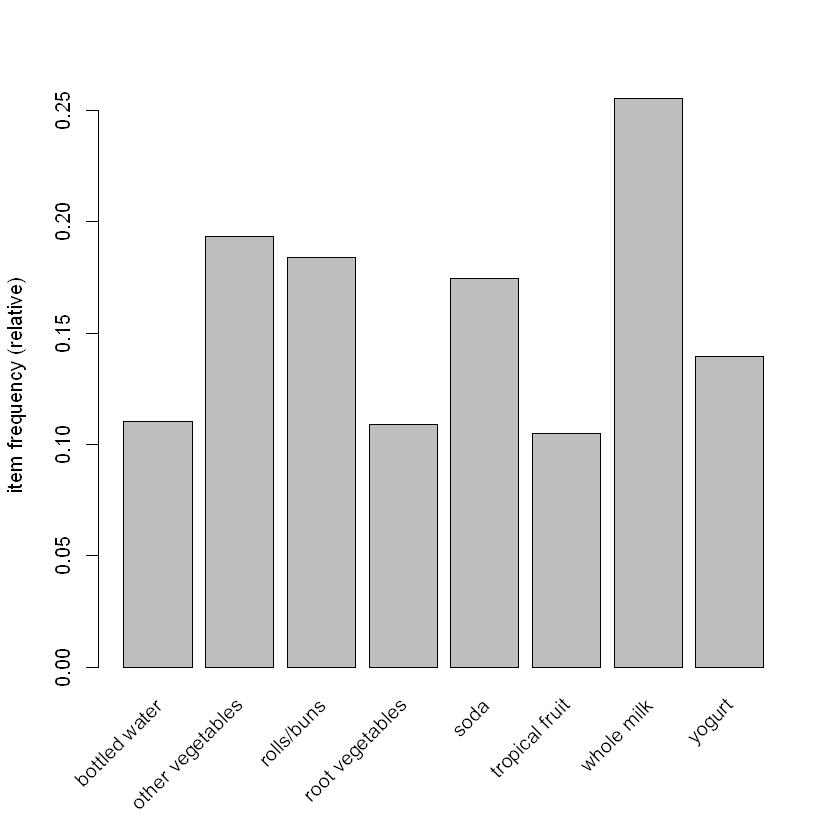

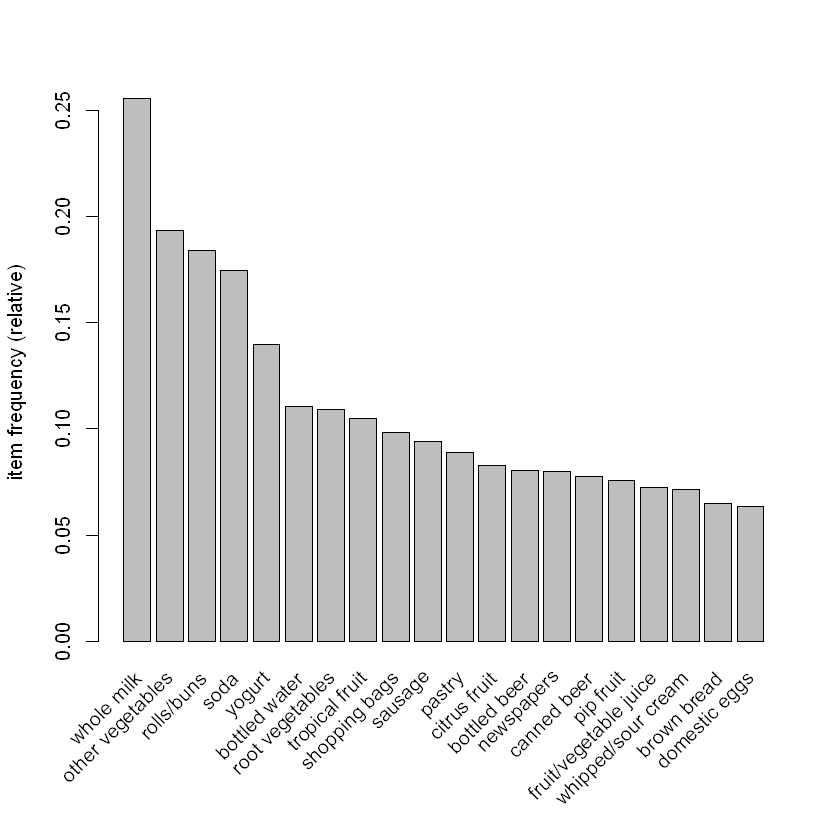

In [8]:
itemFrequencyPlot(groceries, support = 0.1)
itemFrequencyPlot(groceries, topN = 20)

### visualizing the transaction data - plotting the sparse matrix

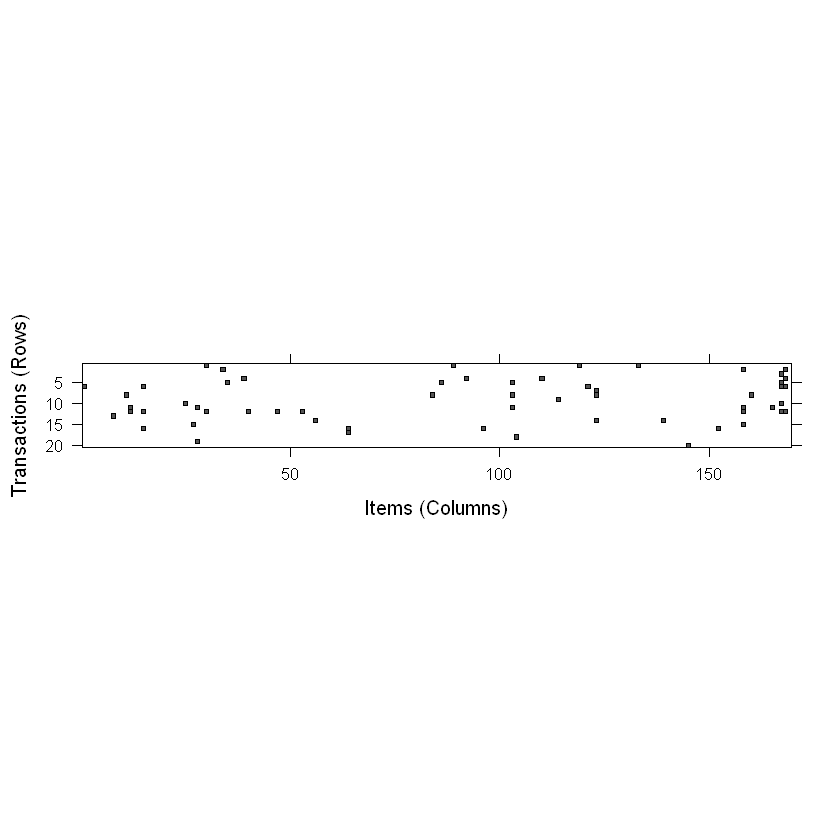

In [14]:
image(groceries[1:20])
# cells in the matrix are filled in black for transactions (rows) where the item (column) was purchased
# also possible to look at a random sample via wrapping image() function around sample(x, n) 

## Step 3: Training a model on the data

In [17]:
# an apriori function is already in the arules packages
# the standard settings are support = 0.1 and confidency 0.8. However, there are just 8 items > 0.1 support
groceryrules <- apriori(groceries, parameter = list(support = 0.006, confidence = 0.25, minlen = 2))
groceryrules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 463 rules 

## Step 4: Evaluating model performance

In [18]:
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

<b>the lift measure is a particularly important one:</b>
-  it measures how much more likely one item or itemset is to be purchased relative to its typical rate of purchase, given that you know another item/ itemsset has been purchased 
- if lift > 1 this implies that items are found together more often that expected by chance alone

In [19]:
inspect(groceryrules[1:3])

    lhs                rhs               support     confidence coverage  
[1] {potted plants} => {whole milk}      0.006914082 0.4000000  0.01728521
[2] {pasta}         => {whole milk}      0.006100661 0.4054054  0.01504830
[3] {herbs}         => {root vegetables} 0.007015760 0.4312500  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   


## Step 5: Improving model performance

### Sorting the set of association rules

In [20]:
inspect(sort(groceryrules, by = "lift")[1:10])

     lhs                   rhs                      support confidence   coverage     lift count
[1]  {herbs}            => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2]  {berries}          => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3]  {other vegetables,                                                                         
      tropical fruit,                                                                           
      whole milk}       => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4]  {beef,                                                                                     
      other vegetables} => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5]  {other vegetables,                                                                         
      tropical fruit}   => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93
[6]  {beef,                   

### Taking subsets of association rules

In [21]:
berryrules <- subset(groceryrules, items %in% "berries")
inspect(berryrules)

    lhs          rhs                  support     confidence coverage  lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  0.0332486 3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  0.0332486 2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  0.0332486 1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  0.0332486 1.388328
    count
[1]  89  
[2] 104  
[3] 101  
[4] 116  


In [32]:
# using "%pin%" operator to check for partial matches
inspect(sort(subset(groceryrules, items %pin% "bread")), by = "lift")

    lhs                               rhs                support     confidence
[1] {brown bread}                  => {whole milk}       0.025216065 0.3887147 
[2] {brown bread}                  => {other vegetables} 0.018708693 0.2884013 
[3] {white bread}                  => {whole milk}       0.017081851 0.4057971 
[4] {white bread}                  => {other vegetables} 0.013726487 0.3260870 
[5] {brown bread,other vegetables} => {whole milk}       0.009354347 0.5000000 
[6] {brown bread,whole milk}       => {other vegetables} 0.009354347 0.3709677 
[7] {semi-finished bread}          => {whole milk}       0.007117438 0.4022989 
[8] {brown bread,yogurt}           => {whole milk}       0.007117438 0.4895105 
[9] {brown bread,whole milk}       => {yogurt}           0.007117438 0.2822581 
    coverage   lift     count
[1] 0.06487036 1.521293 248  
[2] 0.06487036 1.490503 184  
[3] 0.04209456 1.588147 168  
[4] 0.04209456 1.685268 135  
[5] 0.01870869 1.956825  92  
[6] 0.02521607 1.917

In [33]:
# Using the "%ain%" operator to look up complete matches (that is, all terms must be included)
inspect(sort(subset(groceryrules, items %ain% c("bottled water", "soda"))), by = "lift")

    lhs                           rhs             support     confidence
[1] {bottled water}            => {soda}          0.028978139 0.2621895 
[2] {bottled water,soda}       => {whole milk}    0.007524148 0.2596491 
[3] {bottled water,soda}       => {yogurt}        0.007422471 0.2561404 
[4] {bottled water,yogurt}     => {soda}          0.007422471 0.3230088 
[5] {soda,yogurt}              => {bottled water} 0.007422471 0.2713755 
[6] {bottled water,rolls/buns} => {soda}          0.006812405 0.2815126 
    coverage   lift     count
[1] 0.11052364 1.503577 285  
[2] 0.02897814 1.016176  74  
[3] 0.02897814 1.836108  73  
[4] 0.02297916 1.852357  73  
[5] 0.02735130 2.455361  73  
[6] 0.02419929 1.614389  67  
